### ปริยวิศว์ เตชะกฤตเมธีธำรง 6510450593

In [96]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import graphviz

### เช็คว่ามีข้อมูลว่าง/หาย หรือไม่

In [97]:
df = pd.read_csv('fertility.csv')
df.info() # ข้อมูลครบทุกหลัก

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Age                               139 non-null    int64 
 1   kidney diseases                   139 non-null    object
 2   Fasting Blood sugar               139 non-null    int64 
 3   Uri infection                     139 non-null    object
 4   exercise habit                    139 non-null    object
 5   Frequency of alcohol consumption  139 non-null    object
 6   Smoking habit                     139 non-null    object
 7   profession                        139 non-null    object
 8   #hours spent sitting per day      139 non-null    int64 
 9   Diagnosis                         139 non-null    object
dtypes: int64(3), object(7)
memory usage: 11.0+ KB


In [98]:
df.head()

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,no,80,yes,more than 3 months ago,once a week,occasional,engineer,16,Normal
1,35,yes,140,yes,less than 3 hours a week,once a week,daily,engineer,6,weak
2,27,yes,99,no,more than 3 months ago,hardly ever or never,never,engineer,9,Normal
3,32,no,96,yes,more than 3 months ago,hardly ever or never,never,engineer,7,Normal
4,30,yes,134,no,less than 3 hours a week,once a week,never,engineer,9,weak


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;กระทรวงสาธารณสุขต้องการเพิ่มจำานวนประชากรจึงมีการเก็บข้อมูลภาวะการมีบุตรยากของเพศชาย (Diagnosis) ว่าปกติหรืออ่อนแอ (normal/weak) โดยเก็บข้อมูลที่ประกอบด้วยข้อมูลสุขภาพ ได้แก่ ภาวะโรคไต (Kidney disease) ระดับนํ้าตาลในเลือด (Fasting blood sugar) การติดเชื้อในทางเดินปัสสาวะ (Uri infection) รวมถึงพฤติกรรมการใช้ชีวิต ได้แก่ การออกกำาลังกาย (exercise habit) การดื่มสุรา (Frequency of alcohol consumption) การสูบบุหรี่ (Smoking habit) จำานวนชั่วโมงที่นั่งอยู่กับที่ (#hours sit) อายุ และอาชีพ

**ให้นิสิตใช้ขั้นตอนวิธีต้นไม้ตัดสินใจเรียนรู้จากชุดข้อมูล fertility วัดประสิทธิภาพ และแสดงผลภาพต้นไม้**


### ทำ Label Encoding แยกค่าใน column ให้เป็นตัวเลข

In [99]:
label_encoder = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,Age,kidney diseases,Fasting Blood sugar,Uri infection,exercise habit,Frequency of alcohol consumption,Smoking habit,profession,#hours spent sitting per day,Diagnosis
0,30,0,80,1,2,2,2,1,16,0
1,35,1,140,1,0,2,0,1,6,1
2,27,1,99,0,2,1,1,1,9,0
3,32,0,96,1,2,1,1,1,7,0
4,30,1,134,0,0,2,1,1,9,1


### แบ่ง train set และ test set X = features y = target (Diagnosis)

In [100]:
X = df.drop(columns='Diagnosis')
y = df['Diagnosis'] # 0 = normal, 1 = weak

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=123)

In [101]:
model = DecisionTreeClassifier(
    ccp_alpha=0.001,
    criterion='gini',
    max_depth=5,
    min_samples_split=5,
    min_samples_leaf=5,
    max_features='sqrt',
    splitter='random',
    random_state=123
)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5, max_features='sqrt',
                       min_samples_leaf=5, min_samples_split=5,
                       random_state=123, splitter='random')

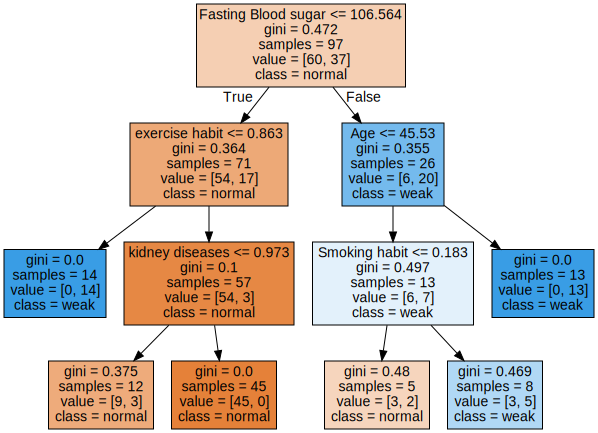

In [102]:
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=X.columns,
                                class_names=['normal', 'weak'],
                                filled=True)

graphviz.Source(dot_data, format="png")

### เช็ค training set score และ test set score

In [103]:
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print(f'Training set score: {train_score}')
print(f'Test set score: {test_score}')

Training set score: 0.9175257731958762
Test set score: 0.9761904761904762


In [109]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[26  0]
 [ 1 15]]
0.9761904761904762


### แสดงค่าความสำคัญของ feature แต่ละตัว

In [104]:
feature_importance_list = []

for feature, importance in zip(X.columns, model.feature_importances_):
    feature_importance_list.append([feature, importance])

sorted_feature_importance = sorted(feature_importance_list, key=lambda x: x[1], reverse=True)

print("ลำดับความสำคัญของ feature\n")
for feature, importance in sorted_feature_importance:
    print(f"{feature:<40}: {importance:.10f}")

ลำดับความสำคัญของ feature

exercise habit                          : 0.5744051445
Fasting Blood sugar                     : 0.3041657073
Age                                     : 0.0788433598
kidney diseases                         : 0.0337159104
Smoking habit                           : 0.0088698780
Uri infection                           : 0.0000000000
Frequency of alcohol consumption        : 0.0000000000
profession                              : 0.0000000000
#hours spent sitting per day            : 0.0000000000
